In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 1: Create the dataset
np.random.seed(42)
n_customers = 200
df = pd.DataFrame({
    'CustomerID': np.arange(1, n_customers+1),
    'Age': np.random.randint(18, 70, size=n_customers),
    'Annual Income (k$)': np.random.randint(15, 140, size=n_customers),
    'Spending Score (1-100)': np.random.randint(1, 101, size=n_customers)
})

print(df)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0             1   56                  84                      61
1             2   69                  86                      48
2             3   46                  41                      19
3             4   32                  23                       4
4             5   60                  76                      35
..          ...  ...                 ...                     ...
195         196   69                  42                      51
196         197   30                 125                      43
197         198   58                  78                      12
198         199   20                 111                      67
199         200   56                  83                      65

[200 rows x 4 columns]


In [5]:
# Step 2: Hierarchical clustering (Ward’s method)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
Z = linkage(X, method='ward')

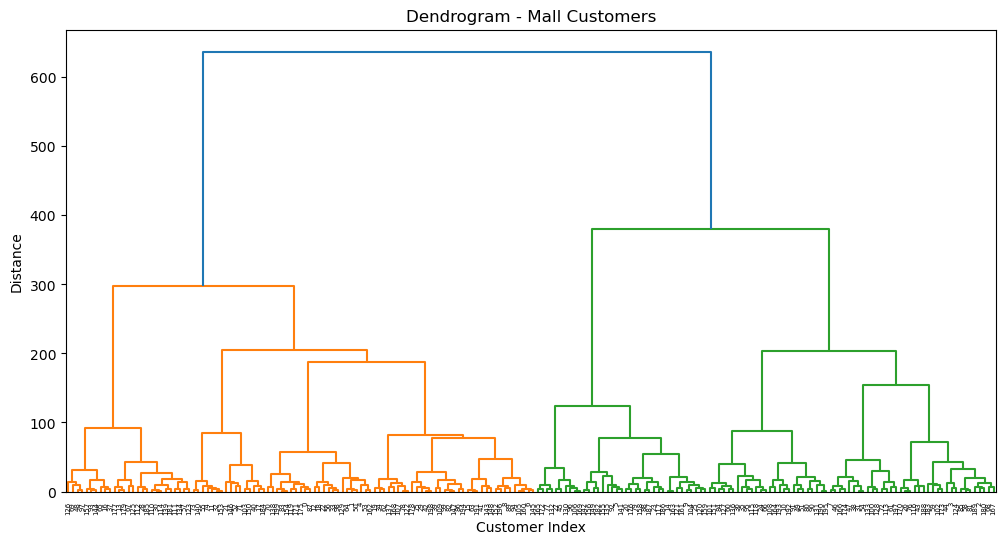

In [6]:
# Step 3: Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.title("Dendrogram - Mall Customers")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

In [7]:
# Step 4: Choose clusters (cut the tree)
clusters = fcluster(Z, t=5, criterion='maxclust')
df['Cluster'] = clusters

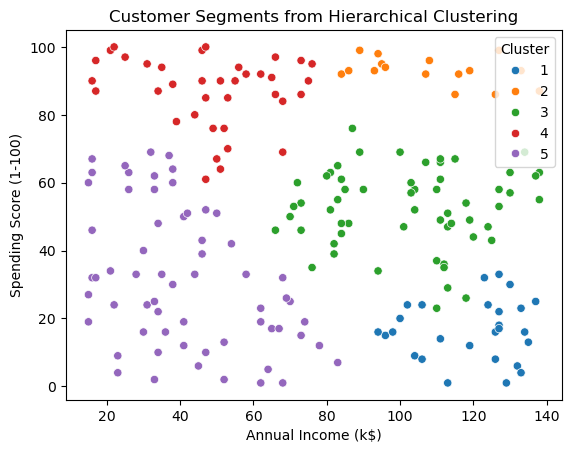

In [8]:
# Step 5: Visualize clusters
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title("Customer Segments from Hierarchical Clustering")
plt.show()